In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ellipse import LsqEllipse
import load_and_process as lp
from scipy.ndimage import median_filter

In [30]:
# path = '/home/ikharitonov/Desktop/sleap_training/'
# file = 'second_ellipse.003_20204321_343_5.analysis.csv'
# path = '/home/ikharitonov/RANCZLAB-NAS/data/ONIX/20240730_Mismatch_Experiment/MMclosed&Regular_120824/2024-08-12T16-51-16_B3M3/VideoData1/'
# file = 'VideoData1_1904-01-14T04-00-00_SLEAP_OUTPUT.csv'
# path = '/home/ikharitonov/RANCZLAB-NAS/data/ONIX/20240730_Mismatch_Experiment/MMclosed&Regular_130824/2024-08-13T12-53-01_B3M3/VideoData1/'
# file = 'sleap_output.csv'
path = '/home/ikharitonov/RANCZLAB-NAS/data/ONIX/20240730_Mismatch_Experiment/training_day4/2024-08-02T12-25-55_B3M3/VideoData2/'
file = 'VideoData2_1904-01-03T23-00-00_sleap_analysis.csv'
df = lp.load_df(path+file)
df

,track,frame_idx,instance.score,left.x,left.y,left.score,center.x,center.y,center.score,right.x,...,p2.score,p8.x,p8.y,p8.score,p4.x,p4.y,p4.score,p6.x,p6.y,p6.score
0,NaN,0,NaN,163.904974,295.557557,NaN,239.196627,271.760077,NaN,366.443379,...,NaN,225.328382,289.897119,NaN,253.816808,257.256062,NaN,252.579801,289.149341,NaN
1,NaN,1,10.212954,163.736450,295.647064,0.982247,239.632309,272.209320,0.934060,364.320496,...,0.956285,227.285034,288.264862,0.863690,252.411591,256.382965,0.952811,251.869720,288.116882,0.880531
2,NaN,2,10.359891,163.699326,292.336151,1.016272,239.667587,272.167084,0.952217,364.176971,...,0.968861,227.406708,288.120575,0.896477,252.438568,259.415466,0.947811,251.878326,288.028381,0.902798
3,NaN,3,10.421487,163.845123,292.215546,1.002152,239.793808,272.148193,0.966211,364.096405,...,0.975506,227.593399,288.053528,0.912141,252.433060,259.600403,0.957559,251.877472,287.928223,0.921246
4,NaN,4,10.338270,163.904037,292.269867,0.990069,239.660767,272.159058,0.958359,364.033478,...,0.957251,227.465668,287.979095,0.891923,252.383286,259.577850,0.953956,251.919052,287.900940,0.915891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13156,NaN,13169,10.943019,163.889038,296.045685,1.053002,255.849091,271.744476,1.020667,368.048462,...,1.031755,247.637985,280.235352,1.051277,263.979797,263.441223,1.006624,264.277039,280.243317,0.982499
13157,NaN,13170,10.798992,163.908539,296.210327,1.022105,255.856354,271.819305,0.978433,371.671021,...,0.992947,247.759415,280.189575,1.028840,263.907928,263.627411,1.004144,264.159576,280.231110,0.962978
13158,NaN,13171,10.748046,163.904465,296.522003,1.027911,256.044312,271.895325,0.997026,371.834106,...,1.013916,247.730804,280.390411,1.011382,264.297302,263.560760,0.994487,264.514343,283.429077,0.947689
13159,NaN,13172,10.855190,163.945602,296.301392,1.041812,255.863022,271.897919,0.998376,371.595123,...,0.994463,247.702896,280.303802,1.044879,263.905426,263.699432,1.007771,264.195557,280.328369,0.958097


In [31]:
df = df.drop(columns=['track'])

In [32]:
df.loc[0]

frame_idx           0.000000
instance.score           NaN
left.x            163.904974
left.y            295.557557
left.score               NaN
center.x          239.196627
center.y          271.760077
center.score             NaN
right.x           366.443379
right.y           260.912401
right.score              NaN
p1.x              220.019436
p1.y              273.825145
p1.score                 NaN
p5.x              261.417118
p5.y              272.068355
p5.score                 NaN
p3.x              239.402287
p3.y              251.873164
p3.score                 NaN
p7.x              238.427150
p7.y              294.038816
p7.score                 NaN
p2.x              226.024796
p2.y              259.241724
p2.score                 NaN
p8.x              225.328382
p8.y              289.897119
p8.score                 NaN
p4.x              253.816808
p4.y              257.256062
p4.score                 NaN
p6.x              252.579801
p6.y              289.149341
p6.score      

In [33]:
no_nan_rows = df.dropna()
groups = no_nan_rows.groupby(no_nan_rows.index)
groups

In [34]:
no_nan_rows

,frame_idx,instance.score,left.x,left.y,left.score,center.x,center.y,center.score,right.x,right.y,...,p2.score,p8.x,p8.y,p8.score,p4.x,p4.y,p4.score,p6.x,p6.y,p6.score
1,1,10.212954,163.736450,295.647064,0.982247,239.632309,272.209320,0.934060,364.320496,260.253998,...,0.956285,227.285034,288.264862,0.863690,252.411591,256.382965,0.952811,251.869720,288.116882,0.880531
2,2,10.359891,163.699326,292.336151,1.016272,239.667587,272.167084,0.952217,364.176971,260.225494,...,0.968861,227.406708,288.120575,0.896477,252.438568,259.415466,0.947811,251.878326,288.028381,0.902798
3,3,10.421487,163.845123,292.215546,1.002152,239.793808,272.148193,0.966211,364.096405,260.082977,...,0.975506,227.593399,288.053528,0.912141,252.433060,259.600403,0.957559,251.877472,287.928223,0.921246
4,4,10.338270,163.904037,292.269867,0.990069,239.660767,272.159058,0.958359,364.033478,260.118927,...,0.957251,227.465668,287.979095,0.891923,252.383286,259.577850,0.953956,251.919052,287.900940,0.915891
5,5,10.159909,163.824936,295.776367,0.971778,239.889908,272.217072,0.959880,364.483124,260.297699,...,0.942423,227.457489,288.262695,0.872622,255.757202,256.498962,0.947081,252.262558,288.172791,0.870608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13156,13169,10.943019,163.889038,296.045685,1.053002,255.849091,271.744476,1.020667,368.048462,263.937317,...,1.031755,247.637985,280.235352,1.051277,263.979797,263.441223,1.006624,264.277039,280.243317,0.982499
13157,13170,10.798992,163.908539,296.210327,1.022105,255.856354,271.819305,0.978433,371.671021,264.292725,...,0.992947,247.759415,280.189575,1.028840,263.907928,263.627411,1.004144,264.159576,280.231110,0.962978
13158,13171,10.748046,163.904465,296.522003,1.027911,256.044312,271.895325,0.997026,371.834106,264.349152,...,1.013916,247.730804,280.390411,1.011382,264.297302,263.560760,0.994487,264.514343,283.429077,0.947689
13159,13172,10.855190,163.945602,296.301392,1.041812,255.863022,271.897919,0.998376,371.595123,263.977753,...,0.994463,247.702896,280.303802,1.044879,263.905426,263.699432,1.007771,264.195557,280.328369,0.958097


In [39]:
# df = df.loc[1000*60:1060*60]
# df = df[df['frame_idx'].between(1912*60, 1972*60)] # MMclosed&Regular_130824/2024-08-13T12-53-01_B3M3/VideoData1
df = df[df['frame_idx'].between(0*60, 60*60)]

In [40]:
no_nan_rows[no_nan_rows['frame_idx'].between(0*60, 2060*60)]

,frame_idx,instance.score,left.x,left.y,left.score,center.x,center.y,center.score,right.x,right.y,...,p2.score,p8.x,p8.y,p8.score,p4.x,p4.y,p4.score,p6.x,p6.y,p6.score
1,1,10.212954,163.736450,295.647064,0.982247,239.632309,272.209320,0.934060,364.320496,260.253998,...,0.956285,227.285034,288.264862,0.863690,252.411591,256.382965,0.952811,251.869720,288.116882,0.880531
2,2,10.359891,163.699326,292.336151,1.016272,239.667587,272.167084,0.952217,364.176971,260.225494,...,0.968861,227.406708,288.120575,0.896477,252.438568,259.415466,0.947811,251.878326,288.028381,0.902798
3,3,10.421487,163.845123,292.215546,1.002152,239.793808,272.148193,0.966211,364.096405,260.082977,...,0.975506,227.593399,288.053528,0.912141,252.433060,259.600403,0.957559,251.877472,287.928223,0.921246
4,4,10.338270,163.904037,292.269867,0.990069,239.660767,272.159058,0.958359,364.033478,260.118927,...,0.957251,227.465668,287.979095,0.891923,252.383286,259.577850,0.953956,251.919052,287.900940,0.915891
5,5,10.159909,163.824936,295.776367,0.971778,239.889908,272.217072,0.959880,364.483124,260.297699,...,0.942423,227.457489,288.262695,0.872622,255.757202,256.498962,0.947081,252.262558,288.172791,0.870608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13156,13169,10.943019,163.889038,296.045685,1.053002,255.849091,271.744476,1.020667,368.048462,263.937317,...,1.031755,247.637985,280.235352,1.051277,263.979797,263.441223,1.006624,264.277039,280.243317,0.982499
13157,13170,10.798992,163.908539,296.210327,1.022105,255.856354,271.819305,0.978433,371.671021,264.292725,...,0.992947,247.759415,280.189575,1.028840,263.907928,263.627411,1.004144,264.159576,280.231110,0.962978
13158,13171,10.748046,163.904465,296.522003,1.027911,256.044312,271.895325,0.997026,371.834106,264.349152,...,1.013916,247.730804,280.390411,1.011382,264.297302,263.560760,0.994487,264.514343,283.429077,0.947689
13159,13172,10.855190,163.945602,296.301392,1.041812,255.863022,271.897919,0.998376,371.595123,263.977753,...,0.994463,247.702896,280.303802,1.044879,263.905426,263.699432,1.007771,264.195557,280.328369,0.958097


In [92]:
for i in range(2000):
    print(i, np.unique(np.diff(no_nan_rows[no_nan_rows['frame_idx'].between(i*60, (i+60)*60)]['frame_idx'].values)).shape)

0 (11,)
1 (12,)
2 (12,)
3 (12,)
4 (12,)
5 (12,)
6 (12,)
7 (13,)
8 (14,)
9 (14,)
10 (14,)
11 (14,)
12 (15,)
13 (16,)
14 (16,)
15 (17,)
16 (17,)
17 (17,)
18 (17,)
19 (19,)
20 (19,)
21 (19,)
22 (19,)
23 (19,)
24 (19,)
25 (19,)
26 (19,)
27 (19,)
28 (19,)
29 (20,)
30 (20,)
31 (22,)
32 (21,)
33 (23,)
34 (23,)
35 (23,)
36 (23,)
37 (23,)
38 (24,)
39 (24,)
40 (24,)
41 (24,)
42 (24,)
43 (25,)
44 (25,)
45 (25,)
46 (25,)
47 (25,)
48 (25,)
49 (25,)
50 (25,)
51 (25,)
52 (25,)
53 (25,)
54 (25,)
55 (25,)
56 (25,)
57 (25,)
58 (25,)
59 (25,)
60 (23,)
61 (23,)
62 (23,)
63 (23,)
64 (23,)
65 (23,)
66 (23,)
67 (22,)
68 (23,)
69 (23,)
70 (23,)
71 (23,)
72 (22,)
73 (22,)
74 (22,)
75 (21,)
76 (21,)
77 (21,)
78 (21,)
79 (21,)
80 (21,)
81 (21,)
82 (21,)
83 (21,)
84 (21,)
85 (21,)
86 (21,)
87 (21,)
88 (21,)
89 (18,)
90 (18,)
91 (17,)
92 (16,)
93 (14,)
94 (13,)
95 (13,)
96 (13,)
97 (13,)
98 (12,)
99 (12,)
100 (12,)
101 (11,)
102 (11,)
103 (9,)
104 (10,)
105 (10,)
106 (10,)
107 (9,)
108 (9,)
109 (9,)
110 (9,)
111 (

842 (17,)
843 (18,)
844 (20,)
845 (20,)
846 (21,)
847 (21,)
848 (22,)
849 (22,)
850 (22,)
851 (22,)
852 (22,)
853 (23,)
854 (25,)
855 (26,)
856 (26,)
857 (26,)
858 (26,)
859 (26,)
860 (26,)
861 (26,)
862 (26,)
863 (26,)
864 (27,)
865 (26,)
866 (26,)
867 (26,)
868 (26,)
869 (28,)
870 (30,)
871 (31,)
872 (30,)
873 (30,)
874 (30,)
875 (30,)
876 (30,)
877 (29,)
878 (29,)
879 (29,)
880 (29,)
881 (29,)
882 (29,)
883 (29,)
884 (29,)
885 (27,)
886 (28,)
887 (28,)
888 (28,)
889 (28,)
890 (27,)
891 (27,)
892 (27,)
893 (27,)
894 (27,)
895 (27,)
896 (27,)
897 (27,)
898 (27,)
899 (27,)
900 (27,)
901 (26,)
902 (26,)
903 (25,)
904 (23,)
905 (22,)
906 (21,)
907 (21,)
908 (21,)
909 (21,)
910 (21,)
911 (20,)
912 (20,)
913 (20,)
914 (19,)
915 (19,)
916 (19,)
917 (19,)
918 (19,)
919 (19,)
920 (18,)
921 (18,)
922 (18,)
923 (17,)
924 (17,)
925 (17,)
926 (17,)
927 (17,)
928 (16,)
929 (15,)
930 (13,)
931 (12,)
932 (12,)
933 (12,)
934 (12,)
935 (10,)
936 (12,)
937 (12,)
938 (12,)
939 (11,)
940 (12,)
941 (12,)


1748 (17,)
1749 (17,)
1750 (17,)
1751 (17,)
1752 (17,)
1753 (17,)
1754 (16,)
1755 (16,)
1756 (16,)
1757 (16,)
1758 (16,)
1759 (16,)
1760 (16,)
1761 (16,)
1762 (16,)
1763 (16,)
1764 (15,)
1765 (15,)
1766 (15,)
1767 (15,)
1768 (15,)
1769 (15,)
1770 (15,)
1771 (15,)
1772 (15,)
1773 (15,)
1774 (15,)
1775 (15,)
1776 (15,)
1777 (16,)
1778 (17,)
1779 (18,)
1780 (17,)
1781 (17,)
1782 (17,)
1783 (17,)
1784 (17,)
1785 (17,)
1786 (16,)
1787 (16,)
1788 (16,)
1789 (16,)
1790 (16,)
1791 (16,)
1792 (16,)
1793 (16,)
1794 (16,)
1795 (16,)
1796 (15,)
1797 (15,)
1798 (15,)
1799 (15,)
1800 (12,)
1801 (12,)
1802 (12,)
1803 (12,)
1804 (12,)
1805 (12,)
1806 (12,)
1807 (12,)
1808 (12,)
1809 (12,)
1810 (12,)
1811 (12,)
1812 (12,)
1813 (12,)
1814 (12,)
1815 (12,)
1816 (12,)
1817 (11,)
1818 (11,)
1819 (11,)
1820 (12,)
1821 (13,)
1822 (13,)
1823 (13,)
1824 (13,)
1825 (13,)
1826 (13,)
1827 (13,)
1828 (13,)
1829 (13,)
1830 (13,)
1831 (13,)
1832 (13,)
1833 (14,)
1834 (14,)
1835 (17,)
1836 (17,)
1837 (15,)
1838 (14,)

In [95]:
np.unique(np.diff(no_nan_rows[no_nan_rows['frame_idx'].between(1912*60, 1972*60)]['frame_idx'].values))

array([1])

(array([   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0., 3080.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.]),
 array([0.5 , 0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ,
        1.05, 1.1 , 1.15, 1.2 , 1.25, 1.3 , 1.35, 1.4 , 1.45, 1.5 ]),
 <BarContainer object of 20 artists>)

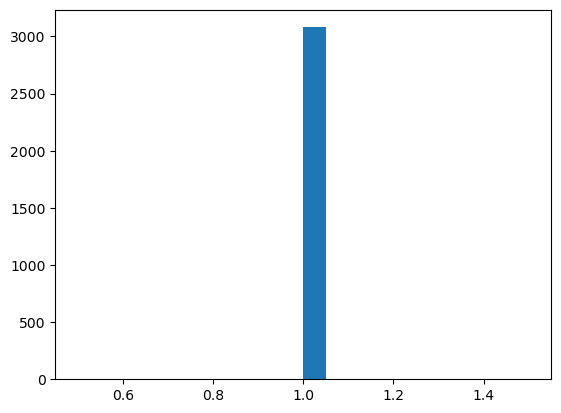

In [97]:
plt.hist(np.diff(no_nan_rows[no_nan_rows['frame_idx'].between(1912*60, 1972*60)]['frame_idx'].values), bins=20)

In [35]:
# Interpolate NaN values
columns_of_interest = ['left', 'right', 'center', 'p1', 'p2', 'p3', 'p4', 'p5', 'p6', 'p7', 'p8']
for col in columns_of_interest:
    df[[f'{col}.x']] = df[[f'{col}.x']].interpolate(method='polynomial', order=2)  # for a polynomial fit
    df[[f'{col}.y']] = df[[f'{col}.y']].interpolate(method='polynomial', order=2)  # for a polynomial fit
    
# df[['center']] = df[['center']].interpolate(method='polynomial', order=2)  # for a polynomial fit

/tmp/ipykernel_3592338/3285493785.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[[f'{col}.x']] = df[[f'{col}.x']].interpolate(method='polynomial', order=9)  # for a polynomial fit
/tmp/ipykernel_3592338/3285493785.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[[f'{col}.y']] = df[[f'{col}.y']].interpolate(method='polynomial', order=9)  # for a polynomial fit
/tmp/ipykernel_3592338/3285493785.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

In [41]:
df

,frame_idx,instance.score,left.x,left.y,left.score,center.x,center.y,center.score,right.x,right.y,...,p2.score,p8.x,p8.y,p8.score,p4.x,p4.y,p4.score,p6.x,p6.y,p6.score
0,0,NaN,163.904974,295.557557,NaN,239.196627,271.760077,NaN,366.443379,260.912401,...,NaN,225.328382,289.897119,NaN,253.816808,257.256062,NaN,252.579801,289.149341,NaN
1,1,10.212954,163.736450,295.647064,0.982247,239.632309,272.209320,0.934060,364.320496,260.253998,...,0.956285,227.285034,288.264862,0.863690,252.411591,256.382965,0.952811,251.869720,288.116882,0.880531
2,2,10.359891,163.699326,292.336151,1.016272,239.667587,272.167084,0.952217,364.176971,260.225494,...,0.968861,227.406708,288.120575,0.896477,252.438568,259.415466,0.947811,251.878326,288.028381,0.902798
3,3,10.421487,163.845123,292.215546,1.002152,239.793808,272.148193,0.966211,364.096405,260.082977,...,0.975506,227.593399,288.053528,0.912141,252.433060,259.600403,0.957559,251.877472,287.928223,0.921246
4,4,10.338270,163.904037,292.269867,0.990069,239.660767,272.159058,0.958359,364.033478,260.118927,...,0.957251,227.465668,287.979095,0.891923,252.383286,259.577850,0.953956,251.919052,287.900940,0.915891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3596,3596,10.427670,164.143494,292.528564,1.006032,259.716583,268.566040,0.938232,368.424408,260.221863,...,0.966180,247.990387,280.422729,0.976601,268.319611,260.161652,0.945792,268.370819,283.467102,0.948865
3597,3597,10.510343,164.072418,292.392578,1.030070,259.735565,268.562256,0.937572,368.315613,260.301605,...,0.980656,248.104782,280.372314,0.989985,268.284027,260.172913,0.956159,268.360382,283.433472,0.949796
3598,3598,10.440946,164.064423,292.309967,0.998501,259.772003,271.474152,0.916327,368.186432,260.273163,...,0.969629,248.276077,280.180847,1.005367,268.166443,260.244080,0.950106,268.259857,280.244019,0.974779
3599,3599,10.518993,163.962692,292.189178,0.968429,259.408386,268.430847,0.920082,368.196228,260.018951,...,0.979217,247.982758,280.010986,1.038543,267.768402,260.082123,0.946898,267.922760,280.056030,1.009939


In [42]:
columns_of_interest = ['left.x','left.y','center.x','center.y','right.x','right.y','p1.x','p1.y','p2.x','p2.y','p3.x','p3.y','p4.x','p4.y','p5.x','p5.y','p6.x','p6.y','p7.x','p7.y','p8.x','p8.y']
coordinates_dict = lp.get_coordinates_dict(df, columns_of_interest)

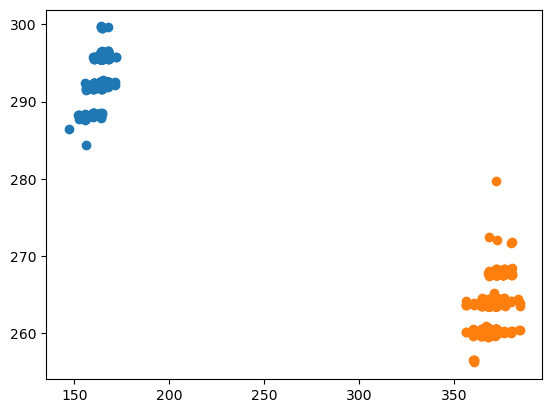

In [43]:
plt.scatter(coordinates_dict['left.x'], coordinates_dict['left.y'])
plt.scatter(coordinates_dict['right.x'], coordinates_dict['right.y'])
plt.show()

In [9]:
outlier_id = np.where(coordinates_dict['left.x'] < 150)
coordinates_dict['left.x'] = np.delete(coordinates_dict['left.x'], outlier_id)
coordinates_dict['left.y'] = np.delete(coordinates_dict['left.y'], outlier_id)

In [6]:
df.loc[outlier_id[0], 'left.x'] = 375
df.loc[outlier_id[0], 'left.y'] = 240

In [7]:
df.iloc[outlier_id[0]]['left.y']

49916    240.0
Name: left.y, dtype: float64

In [44]:
theta = lp.find_horizontal_axis_angle(df, 'left', 'center')
theta

-0.24466991035631439

In [45]:
theta = 10

In [45]:
center_point = lp.get_left_right_center_point(coordinates_dict)
center_point

(266.6604340003146, 277.90818387425554)

In [47]:
center_point = (430, 230)

In [46]:
columns_of_interest = ['left', 'right', 'center', 'p1', 'p2', 'p3', 'p4', 'p5', 'p6', 'p7', 'p8']
remformatted_coordinates_dict = lp.get_reformatted_coordinates_dict(coordinates_dict, columns_of_interest)
centered_coordinates_dict = lp.get_centered_coordinates_dict(remformatted_coordinates_dict, center_point)
rotated_coordinates_dict = lp.get_rotated_coordinates_dict(centered_coordinates_dict, theta)

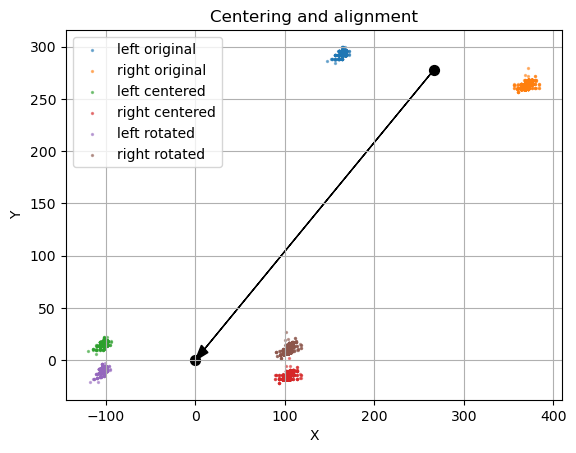

In [47]:
plt.title('Centering and alignment')

plt.scatter(remformatted_coordinates_dict['left'][:,0], remformatted_coordinates_dict['left'][:,1], s=2, alpha=0.5)
plt.scatter(remformatted_coordinates_dict['right'][:,0], remformatted_coordinates_dict['right'][:,1], s=2, alpha=0.5)

plt.scatter(centered_coordinates_dict['left'][:,0], centered_coordinates_dict['left'][:,1], s=2, alpha=0.5)
plt.scatter(centered_coordinates_dict['right'][:,0], centered_coordinates_dict['right'][:,1], s=2, alpha=0.5)


plt.scatter(rotated_coordinates_dict['left'][:,0], rotated_coordinates_dict['left'][:,1], s=2, alpha=0.5)
plt.scatter(rotated_coordinates_dict['right'][:,0], rotated_coordinates_dict['right'][:,1], s=2, alpha=0.5)

plt.scatter(center_point[0], center_point[1], s=50, c='black')
plt.scatter(0, 0, s=50, c='black')
plt.arrow(center_point[0], center_point[1], -center_point[0], -center_point[1], length_includes_head=True, head_width=10, color='black')

plt.legend(['left original', 'right original', 'left centered', 'right centered', 'left rotated', 'right rotated'])
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()
plt.show()

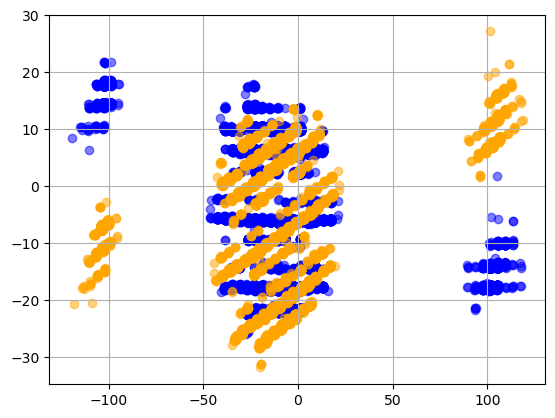

In [48]:
for point, arr in centered_coordinates_dict.items():
    plt.scatter(arr[:,0], arr[:,1], c='blue', alpha=0.5)

for point, arr in rotated_coordinates_dict.items():
    plt.scatter(arr[:,0], arr[:,1], c='orange', alpha=0.5)

plt.grid()
plt.show()

In [49]:
ellipse_parameters_data, ellipse_center_points_data = lp.get_fitted_ellipse_parameters(rotated_coordinates_dict, ['p1', 'p2', 'p3', 'p4', 'p5', 'p6', 'p7', 'p8'])

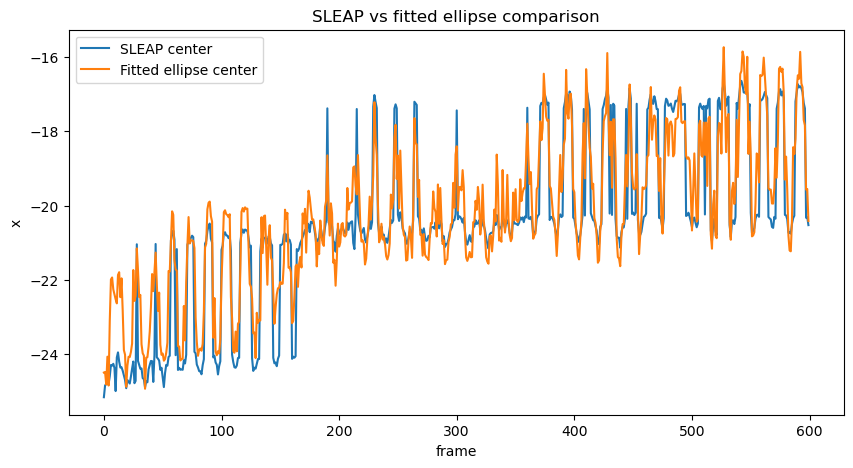

In [50]:
a = 0
b = 600
plt.figure(figsize=(10,5))
plt.title('SLEAP vs fitted ellipse comparison')
plt.plot(rotated_coordinates_dict['center'][a:b,0])
plt.plot(ellipse_center_points_data[a:b,0])
# plt.plot(moving_average_smoothing(ellipse_center_points_data[a:b,0], 10))
# plt.plot(median_filter(ellipse_center_points_data[a:b,0], size=10))
# plt.legend(['SLEAP center', 'Fitted ellipse center', '5 point moving average fitted ellipse', 'Size 5 median filter fitted ellipse'])
plt.legend(['SLEAP center', 'Fitted ellipse center'])
plt.xlabel('frame')
plt.ylabel('x')
plt.show()

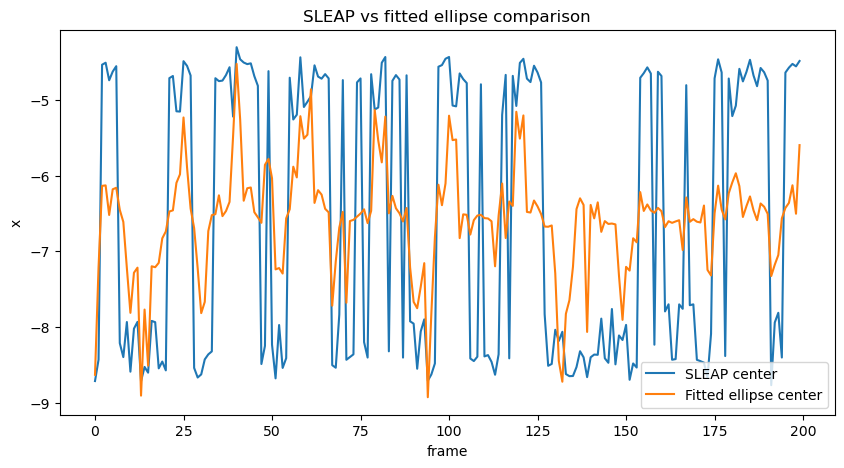

In [51]:
a = 3200
b = 3400
plt.figure(figsize=(10,5))
plt.title('SLEAP vs fitted ellipse comparison')
plt.plot(rotated_coordinates_dict['center'][a:b,0])
plt.plot(ellipse_center_points_data[a:b,0])
# plt.plot(moving_average_smoothing(ellipse_center_points_data[a:b,0], 10))
# plt.plot(median_filter(ellipse_center_points_data[a:b,0], size=10))
# plt.legend(['SLEAP center', 'Fitted ellipse center', '5 point moving average fitted ellipse', 'Size 5 median filter fitted ellipse'])
plt.legend(['SLEAP center', 'Fitted ellipse center'])
plt.xlabel('frame')
plt.ylabel('x')
plt.show()

In [52]:
# frame_rate = 207.76
frame_rate = 60
dt = 1 / frame_rate

In [53]:
ellipse_center_points_data[:,0].shape

(3601,)

In [54]:
seconds_time = np.arange(ellipse_center_points_data[:,0].shape[0]) * dt
seconds_time

array([0.00000000e+00, 1.66666667e-02, 3.33333333e-02, ...,
       5.99666667e+01, 5.99833333e+01, 6.00000000e+01])

In [ ]:
# import seaborn as sns
# sns.set_theme()

In [55]:
from scipy.ndimage import median_filter

def moving_average_smoothing(X,k):
    S = np.zeros(X.shape[0])
    for t in range(X.shape[0]):
        if t < k:
            S[t] = np.mean(X[:t+1])
        else:
            S[t] = np.sum(X[t-k:t])/k
    return S

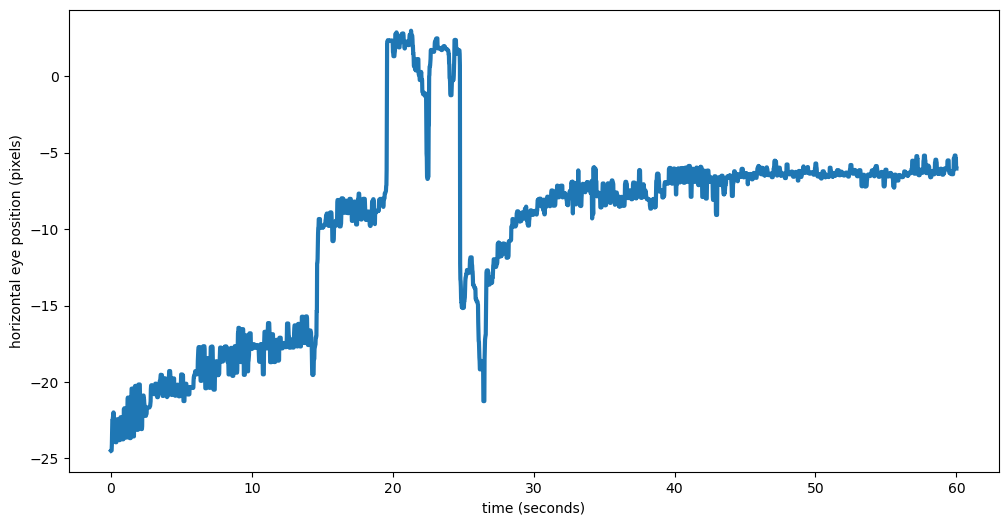

In [56]:
plt.figure(figsize=(12,6))
y = median_filter(ellipse_center_points_data[:,0],size=10)
plt.plot(seconds_time, y, linewidth=3)
plt.xlabel('time (seconds)')
plt.ylabel('horizontal eye position (pixels)')
# plt.xlim([20,50])
# plt.xlim([70,100])
# plt.ylim([-35, -5])
# plt.savefig('eye_position.eps', format='eps')
# plt.savefig('eye_position.png')
plt.show()

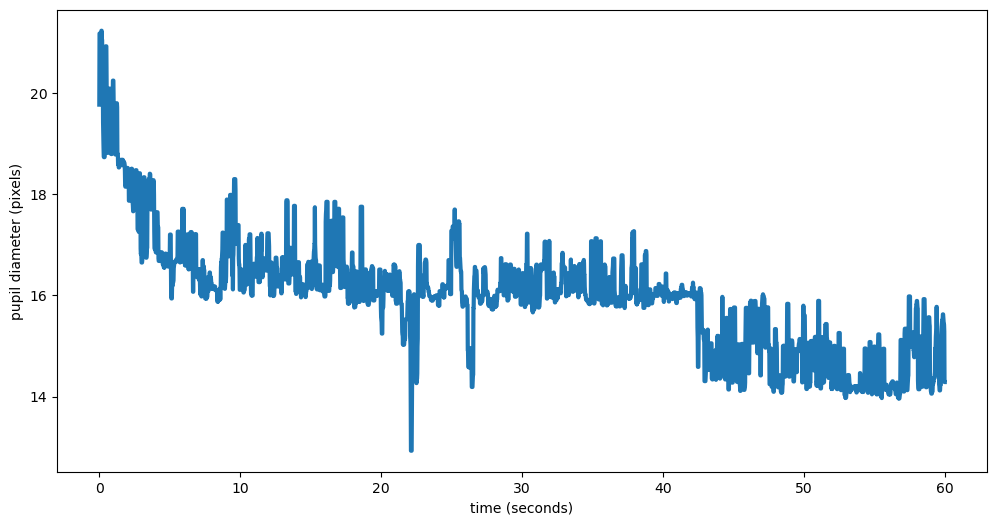

In [57]:
plt.figure(figsize=(12,6))
y = median_filter(ellipse_parameters_data[:,0], size=10)
plt.plot(seconds_time, y, linewidth=3)
plt.xlabel('time (seconds)')
plt.ylabel('pupil diameter (pixels)')
# plt.xlim([70,100])
# plt.ylim([12,25])
# plt.savefig('pupil_diameter.eps', format='eps')
# plt.savefig('pupil_diameter.png')
plt.show()